In [8]:
import os
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

In [9]:
from blocksnet import GraphGenerator, AdjacencyCalculator

blocks = gpd.read_parquet(os.path.join(example_data_path, 'blocks.parquet')).to_crs(local_crs)
intermodal_graph = GraphGenerator(territory=blocks).get_graph('intermodal')

Graph made for 'walk' network type
Graph made for 'bus'
Graph made for 'trolleybus'
Graph made for 'tram'
Graph made for 'subway'


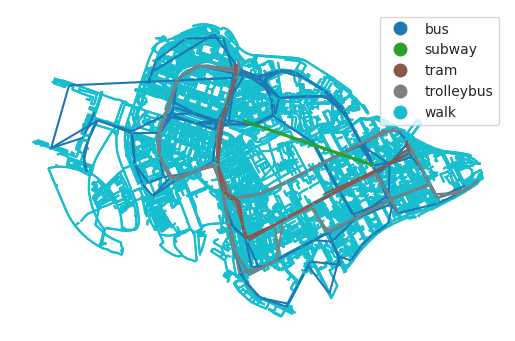

In [10]:
GraphGenerator.plot(intermodal_graph)

In [11]:
adj_matrix = AdjacencyCalculator(blocks=blocks, graph=intermodal_graph).get_dataframe()
adj_matrix.head()

id,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,9.1,17.6,24.0,17.3,18.9,25.6,12.1,28.0,14.5,...,36.7,33.9,29.9,32.6,31.1,28.5,28.8,27.1,25.2,27.9
1,9.1,0.0,17.9,24.3,17.6,19.2,27.4,12.7,28.3,14.8,...,40.9,38.1,31.9,34.6,33.1,30.5,30.8,29.4,27.2,30.2
2,17.6,17.9,0.0,11.4,0.6,6.3,15.9,12.5,15.4,13.1,...,44.3,41.5,36.1,38.8,37.3,34.7,35.0,33.6,31.4,34.4
3,24.0,24.3,11.4,0.0,11.1,7.6,15.3,18.9,9.6,19.5,...,50.7,47.9,42.5,45.2,43.7,41.1,41.4,40.0,37.8,40.8
4,17.3,17.6,0.6,11.1,0.0,6.0,15.6,12.2,15.1,12.8,...,44.0,41.2,35.8,38.5,37.0,34.4,34.7,33.3,31.1,34.1


In [12]:
adj_matrix.to_pickle(os.path.join(example_data_path, 'adjacency_matrix.pickle'))